In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from textblob import TextBlob

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

import joblib

# Exploratory Data Analysis

In [2]:
dataset = pd.read_csv('../Datasets/Data.csv')

In [3]:
dataset

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0
...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [4]:
dataset['oh_label'].value_counts()

0.0    11501
1.0     5347
Name: oh_label, dtype: int64

In [5]:
dataset = dataset[['Text','Annotation', 'oh_label']]
dataset

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,#mkr No No No No No No,none,0.0
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [6]:
dataset['Annotation'].value_counts()

none      11501
sexism     3377
racism     1970
Name: Annotation, dtype: int64

In [7]:
dataset.drop('Annotation', axis=1, inplace=True)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
dataset.isnull().sum()

Text        1
oh_label    3
dtype: int64

In [9]:
dataset.dropna(inplace=True)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Cleaning the text

In [10]:
dataset.head()

,Text,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0


In [11]:
dataset.loc[0]['Text']

'@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj'

In [12]:
sw = stopwords.words('english')

In [13]:
lm = WordNetLemmatizer()

In [14]:
def removeTags(sentence):
  return ' '.join([word for word in sentence.split(' ') if not word.__contains__('@')])

In [15]:
def cleanData(sentence):
  sentence = str(sentence)
  sentence = sentence.lower()

  # Removing @tags from sentences
  sentence = removeTags(sentence)

  # Removing twitter handles urls
  sentence = ' '.join([word if not word.__contains__('https:') else '' for word in sentence.split(' ')])

  # Removing twitter handles urls
  sentence = ' '.join([word if not word.__contains__('http:') else '' for word in sentence.split(' ')])

  # Removing #MKR from tweets
  sentence = ' '.join([word if not word.__contains__('#mkr') else '' for word in sentence.split(' ')])

  # Removing stopwords and lemmatizing 
  sentence = ' '.join([lm.lemmatize(word) for word in sentence.split(' ') if not word in sw])
  
  #Removing special characters
  sentence = re.sub("[^a-z ]", " ", sentence)

  # Removing single characters
  sentence = ' '.join([word if not len(word) == 1 else '' for word in sentence.split(' ')])

  # Removing extra spaces
  sentence = re.sub(" +", " ", sentence)

  return sentence.strip()

In [244]:
joblib.dump(lm, '../Models/Lemmatizer.pkl')

['../Models/Lemmatizer.pkl']

In [16]:
dataset['Cleaned Text'] = dataset['Text'].apply(cleanData)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [17]:
dataset

,Text,oh_label,Cleaned Text
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly
4,#mkr No No No No No No,0.0,
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,pretty good dish we re happy with ok well neve...
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rt deconstructed lemon tart can please go one ...
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,stupid talk to blocked


In [18]:
dataset.isnull().sum()

Text            0
oh_label        0
Cleaned Text    0
dtype: int64

## Get length of sentences

In [19]:
dataset['Length'] = [len(sentence) for sentence in dataset['Cleaned Text']]

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [20]:
dataset

,Text,oh_label,Cleaned Text,Length
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48
4,#mkr No No No No No No,0.0,,0
...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home,45
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,pretty good dish we re happy with ok well neve...,60
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rt deconstructed lemon tart can please go one ...,100
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,stupid talk to blocked,22


In [21]:
# After cleaning the text some cleaned text has no words so will have to remove those records
dataset[dataset['Length'] == 0]

,Text,oh_label,Cleaned Text,Length
4,#mkr No No No No No No,0.0,,0
149,@JillWetzler I ❤️ u,0.0,,0
179,@dankmtl @PeaceNotHate_ http://t.co/HxgNJvWoqG,0.0,,0
211,@Assiye61 http://t.co/dduX3ZbMtE,0.0,,0
240,@98Halima @BilalIGhumman @johnnygjokaj @cdnKha...,0.0,,0
...,...,...,...,...
16576,@olaoliv http://t.co/6PmFc7kdYh,0.0,,0
16719,@iAmCaticorn @CherguiaMbark http://t.co/igBq14...,0.0,,0
16771,@ROJNAME_english http://t.co/Ej5MsCentH,0.0,,0
16778,@98Halima @BilalIGhumman @johnnygjokaj @cdnKha...,0.0,,0


In [22]:
zero_words_index = dataset[dataset['Length'] == 0].index

In [23]:
dataset.drop(zero_words_index, axis=0, inplace=True)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
dataset

,Text,oh_label,Cleaned Text,Length
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48
5,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70
...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home,45
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,pretty good dish we re happy with ok well neve...,60
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rt deconstructed lemon tart can please go one ...,100
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,stupid talk to blocked,22


In [25]:
dataset.reset_index(inplace=True)
dataset.drop('index', axis=1, inplace=True)
dataset

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Text,oh_label,Cleaned Text,Length
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48
4,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70
...,...,...,...,...
16580,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home,45
16581,#MKR 'pretty good dishes we're happy with' - O...,0.0,pretty good dish we re happy with ok well neve...,60
16582,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rt deconstructed lemon tart can please go one ...,100
16583,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,stupid talk to blocked,22


## Most common words

In [26]:
wordDict = dict()
wordsList = list()

In [27]:
def getwordsCount(sentence):
  wordsList = sentence.split(' ')
  for word in wordsList:
    wordDict[word] = wordDict.get(word, 0) + 1

In [28]:
dataset['Cleaned Text'].apply(getwordsCount)

0        None
1        None
2        None
3        None
4        None
         ... 
16580    None
16581    None
16582    None
16583    None
16584    None
Name: Cleaned Text, Length: 16585, dtype: object

In [29]:
sortedDict = dict(sorted(wordDict.items(), key = lambda x: x[1], reverse=True))
#sortedDict

In [30]:
wordsCount = pd.DataFrame(sortedDict.values(), index=sortedDict.keys(), columns=['Count'])
wordsCount.index.name = 'Word'
wordsCount.head(50)

,Count
Word,
rt,3683
kat,1103
sexist,1097
like,1024
woman,992
islam,924
people,708
muslim,701
get,694


In [31]:
px.bar(data_frame = wordsCount.head(50).sort_values(by='Count', ascending=True), x='Count', height=1000, title='Most common words')

## Length of Sentences

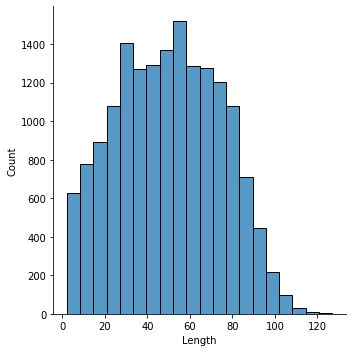

In [32]:
sns.displot(dataset['Length'], bins=20)

In [33]:
dataset

,Text,oh_label,Cleaned Text,Length
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48
4,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70
...,...,...,...,...
16580,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home,45
16581,#MKR 'pretty good dishes we're happy with' - O...,0.0,pretty good dish we re happy with ok well neve...,60
16582,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rt deconstructed lemon tart can please go one ...,100
16583,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,stupid talk to blocked,22


In [34]:
wordsCount.tail(60)

,Count
Word,
onscreen,1
definitive,1
ruling,1
sherry,1
cocktail,1
frikin,1
nina,1
gratitude,1
ancestor,1


# Data Preprocessing & Modeling

In [35]:
# dataset.head()

In [36]:
# negative_df = dataset[dataset['oh_label'] == 0 ].sample(5300)
# positive_df = dataset[dataset['oh_label'] == 1 ].sample(5300)

# dataset = pd.concat([negative_df, positive_df], axis=0)
# dataset

## Vectorizing Text

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [38]:
tfidf = TfidfVectorizer()

In [39]:
X = tfidf.fit_transform(dataset['Cleaned Text']).toarray()
X.shape

(16585, 15258)

In [40]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc 

In [42]:
mnb = MultinomialNB()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset['oh_label'], test_size=.33, random_state=42, shuffle=True)

In [44]:
y_train.value_counts()

0.0    7505
1.0    3606
Name: oh_label, dtype: int64

In [45]:
y_test.value_counts()

0.0    3737
1.0    1737
Name: oh_label, dtype: int64

In [46]:
MODEL_NAME = 'MultinomialNaiveBayes'
mnb.fit(X_train, y_train)

train_pred = mnb.predict(X_train)
test_pred = mnb.predict(X_test)


print('Training')
print('Accuracy Score: ',accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))
print(confusion_matrix(y_train, train_pred))

print('==================================')

print('Test')
score = accuracy_score(y_test, test_pred)
auc_score = roc_auc_score(y_test, test_pred)
print('Accuracy Score: ',score)
print('AUC: ', auc_score)
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Training
Accuracy Score:  0.8515885158851588
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      7505
         1.0       0.94      0.58      0.72      3606

    accuracy                           0.85     11111
   macro avg       0.89      0.78      0.81     11111
weighted avg       0.87      0.85      0.84     11111

[[7382  123]
 [1526 2080]]
Test
Accuracy Score:  0.7849835586408477
AUC:  0.6841517298347957
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      3737
         1.0       0.83      0.41      0.55      1737

    accuracy                           0.78      5474
   macro avg       0.80      0.68      0.70      5474
weighted avg       0.79      0.78      0.76      5474

[[3588  149]
 [1028  709]]


In [47]:
joblib.dump(mnb, '../Models/{}_{}_{}.pkl'.format(MODEL_NAME, round(score*100, 2), round(auc_score*100,2)))

['../Models/MultinomialNaiveBayes_78.5_68.42.pkl']

## Word Embedding (Word2Vec)

In [48]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [49]:
dataset

,Text,oh_label,Cleaned Text,Length
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48
4,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70
...,...,...,...,...
16580,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home,45
16581,#MKR 'pretty good dishes we're happy with' - O...,0.0,pretty good dish we re happy with ok well neve...,60
16582,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rt deconstructed lemon tart can please go one ...,100
16583,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,stupid talk to blocked,22


In [50]:
dataset['Tokens'] = [simple_preprocess(sentence) for sentence in dataset['Cleaned Text']]

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
dataset.head()

,Text,oh_label,Cleaned Text,Length,Tokens
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54,"[read, context, no, change, meaning, history, ..."
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86,"[idiot, claim, people, tried, stop, becoming, ..."
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44,"[rt, call, sexist, go, auto, place, rather, ta..."
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48,"[wrong, isi, follows, example, mohammed, quran..."
4,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70,"[rt, saudi, preacher, raped, tortured, five, y..."


In [52]:
vector_size = 1000
word2vec_model = Word2Vec(dataset['Tokens'], min_count=1, window=10, vector_size=vector_size, workers=8, sg=1)

In [53]:
word2vec_model.wv.get_vector('idiot')

array([ 1.59068897e-01, -1.62096210e-02,  6.12645857e-02,  1.27397582e-01,
        1.51499072e-02,  2.78897434e-02,  8.85943919e-02,  1.12681739e-01,
       -6.33594096e-02,  6.96348995e-02,  6.38258234e-02,  2.63297092e-02,
       -2.58807912e-02,  2.28036456e-02,  8.54240209e-02, -4.30091433e-02,
       -9.73128900e-02, -1.27138896e-02,  7.59315118e-02, -1.32021397e-01,
        2.09686272e-02, -2.50060055e-02, -1.16026355e-02, -1.41014745e-02,
        7.54363984e-02,  2.23613046e-02,  2.70476080e-02, -5.66235073e-02,
       -1.67580739e-01,  6.04459271e-02,  9.31861624e-02, -3.35567184e-02,
       -1.60755950e-03, -8.13387930e-02,  3.77570763e-02, -6.48485869e-02,
        7.51266703e-02,  9.87086538e-03,  2.12977026e-02, -1.15865946e-01,
        1.80366561e-02, -1.30223799e-02, -3.66284288e-02,  1.65488213e-01,
       -2.63127666e-02, -4.65158233e-03, -8.93644020e-02,  1.24801338e-01,
       -4.65367772e-02,  4.12965901e-02, -5.81989065e-03, -2.18067020e-02,
        7.71677913e-03, -

In [54]:
def avgVectors(tokens):
  avg_vector = np.mean([word2vec_model.wv.get_vector(token) for token in tokens], axis=0)
  return avg_vector

In [55]:
dataset['Word2Vec'] = dataset['Tokens'].apply(avgVectors)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
dataset

,Text,oh_label,Cleaned Text,Length,Tokens,Word2Vec
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54,"[read, context, no, change, meaning, history, ...","[0.1391722, -0.015404301, 0.057572592, 0.11904..."
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86,"[idiot, claim, people, tried, stop, becoming, ...","[0.12530968, -0.006700354, 0.058066975, 0.1041..."
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44,"[rt, call, sexist, go, auto, place, rather, ta...","[0.13381705, -0.013543546, 0.08076621, 0.11225..."
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48,"[wrong, isi, follows, example, mohammed, quran...","[0.14474444, -0.010601993, 0.02713455, 0.13810..."
4,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70,"[rt, saudi, preacher, raped, tortured, five, y...","[0.12063544, -0.021805331, 0.05576928, 0.09215..."
...,...,...,...,...,...,...
16580,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home,45,"[feeling, sorry, girls, safe, kat, andre, goin...","[0.15048704, -0.012110224, 0.13803366, 0.08641..."
16581,#MKR 'pretty good dishes we're happy with' - O...,0.0,pretty good dish we re happy with ok well neve...,60,"[pretty, good, dish, we, re, happy, with, ok, ...","[0.13081671, -0.023820447, 0.1275136, 0.123698..."
16582,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rt deconstructed lemon tart can please go one ...,100,"[rt, deconstructed, lemon, tart, can, please, ...","[0.13121797, -0.01306887, 0.12625006, 0.108089..."
16583,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,stupid talk to blocked,22,"[stupid, talk, to, blocked]","[0.13149679, -0.012590678, 0.07335784, 0.12112..."


In [57]:
# Store the vectors for train data in following file
OUTPUT_FOLDER = '../Datasets/'
word2vec_filename = OUTPUT_FOLDER + 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in dataset.iterrows():
        model_vector = (np.mean([word2vec_model.wv.get_vector(token) for token in row['Tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(vector_size))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(vector_size)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



In [58]:
dataset_word2vec = pd.read_csv('../Datasets/train_review_word2vec.csv')
dataset_word2vec

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.139172,-0.015404,0.057573,0.119046,0.013685,0.022992,0.077423,0.115961,-0.044865,0.056218,...,0.026172,-0.029434,0.129981,0.015133,0.053493,-0.043010,-0.077664,-0.087695,-0.067725,-0.025900
1,0.125310,-0.006700,0.058067,0.104196,0.002171,0.017443,0.067311,0.122081,-0.041037,0.050169,...,0.030991,-0.027494,0.110958,0.022329,0.038806,-0.035423,-0.078966,-0.080697,-0.058431,-0.013146
2,0.133817,-0.013544,0.080766,0.112260,-0.019646,-0.027326,0.086766,0.047910,-0.052568,0.039453,...,0.018955,-0.013806,0.111037,0.022271,0.090845,-0.016199,-0.052414,-0.061058,-0.065700,-0.024589
3,0.144744,-0.010602,0.027135,0.138109,0.018115,0.033027,0.091207,0.181945,-0.051138,0.101468,...,0.029048,-0.025057,0.166849,0.018266,0.037110,-0.072879,-0.107979,-0.118019,-0.091262,-0.039369
4,0.120635,-0.021805,0.055769,0.092159,-0.014182,0.018769,0.082231,0.102992,-0.043298,0.036214,...,0.041842,-0.023385,0.093287,0.021078,0.038500,-0.037745,-0.074081,-0.082790,-0.056627,-0.011060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16580,0.150487,-0.012110,0.138034,0.086417,-0.035722,-0.021624,0.080107,0.023067,-0.065379,-0.009039,...,0.043940,-0.007019,0.064244,0.048055,0.080539,0.008690,-0.043842,-0.029989,-0.040435,0.016206
16581,0.130817,-0.023820,0.127514,0.123699,0.001802,-0.009748,0.067108,0.015257,-0.038393,-0.011983,...,0.001896,-0.016280,0.067583,0.004285,0.082278,-0.008132,-0.047996,-0.053658,-0.034887,0.005656
16582,0.131218,-0.013069,0.126250,0.108090,-0.016428,-0.020928,0.071040,0.034713,-0.035535,-0.002747,...,0.022896,-0.032039,0.078839,0.031743,0.087470,0.011023,-0.045950,-0.041572,-0.043497,-0.002814
16583,0.131497,-0.012591,0.073358,0.121129,0.005624,-0.003065,0.079125,0.065997,-0.047527,0.046685,...,0.012508,-0.023177,0.125806,0.011815,0.086856,-0.027691,-0.058323,-0.072766,-0.063418,-0.030536


In [59]:
dataset_word2vec.shape, dataset['oh_label'].shape

((16585, 1000), (16585,))

In [60]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(dataset_word2vec, dataset['oh_label'], test_size=.33, random_state=42, shuffle=True)

In [61]:
y_train_w2v.value_counts()

0.0    7505
1.0    3606
Name: oh_label, dtype: int64

In [62]:
y_test_w2v.value_counts()

0.0    3737
1.0    1737
Name: oh_label, dtype: int64

In [63]:
import time

#Import the DecisionTreeeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Initialize the model
MODEL_NAME = 'XGBClassifier'
clf_decision_word2vec = XGBClassifier()

start_time = time.time()
# Fit the model
clf_decision_word2vec.fit(X_train_w2v, y_train_w2v)
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))


train_pred_w2v = clf_decision_word2vec.predict(X_train_w2v)
test_pred_w2v = clf_decision_word2vec.predict(X_test_w2v)


print('Training')
print(accuracy_score(y_train_w2v, train_pred_w2v))
print(classification_report(y_train_w2v, train_pred_w2v))
print(confusion_matrix(y_train_w2v, train_pred_w2v))

print('==================================')

print('Test')
score = accuracy_score(y_test_w2v, test_pred_w2v)
auc_score = roc_auc_score(y_test_w2v, test_pred_w2v)
print('Accuracy Score: ', score)
print('AUC: ', auc_score)
print(classification_report(y_test_w2v, test_pred_w2v))
print(confusion_matrix(y_test_w2v, test_pred_w2v))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken to fit the model with word2vec vectors: 108.34686231613159
Training
0.998289982899829
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7505
         1.0       1.00      1.00      1.00      3606

    accuracy                           1.00     11111
   macro avg       1.00      1.00      1.00     11111
weighted avg       1.00      1.00      1.00     11111

[[7501    4]
 [  15 3591]]
Test
Accuracy Score:  0.7877237851662404
AUC:  0.728986104043817
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      3737
         1.0       0.71      0.57      0.63      1737

    accura

In [64]:
joblib.dump(mnb, '../Models/{}_{}_{}.pkl'.format(MODEL_NAME, round(score*100, 2), round(auc_score*100,2)))

['../Models/XGBClassifier_78.77_72.9.pkl']

## ANN

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D, Dropout, Bidirectional

In [66]:
y_train_w2v =  np.array(y_train_w2v).reshape(-1,1)
y_test_w2v =  np.array(y_test_w2v).reshape(-1,1)

In [67]:
X_train_w2v.shape, X_test_w2v.shape, y_train_w2v.shape, y_test_w2v.shape

((11111, 1000), (5474, 1000), (11111, 1), (5474, 1))

In [68]:
X_train_w2v_lstm = np.array(X_train_w2v).reshape(-1, 1, vector_size)
X_test_w2v_lstm  = np.array(X_test_w2v).reshape(-1, 1, vector_size)
y_train_w2v_lstm = y_train_w2v.reshape(-1, 1, 1)
y_test_w2v_lstm = y_test_w2v.reshape(-1, 1, 1)

In [69]:
X_train_w2v_lstm.shape, X_test_w2v_lstm.shape, y_train_w2v_lstm.shape, y_test_w2v_lstm.shape

((11111, 1, 1000), (5474, 1, 1000), (11111, 1, 1), (5474, 1, 1))

In [70]:
MODEL_NAME = 'W2V_LSTM'

model = Sequential()

model.add(Bidirectional(LSTM(256, input_shape=(1, vector_size), kernel_initializer = 'he_uniform', activation = 'relu', return_sequences=True)))

model.add(Bidirectional(LSTM(128, kernel_initializer = 'he_uniform', activation='relu')))

model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [71]:
model.fit(X_train_w2v_lstm, y_train_w2v_lstm, validation_data=(X_test_w2v_lstm, y_test_w2v_lstm), epochs=100, batch_size=256)

Epoch 1/100
44/44 [==============================] - 11s 91ms/step - loss: 0.6079 - accuracy: 0.6908 - val_loss: 0.5522 - val_accuracy: 0.7505
Epoch 2/100
44/44 [==============================] - 3s 70ms/step - loss: 0.5358 - accuracy: 0.7522 - val_loss: 0.5311 - val_accuracy: 0.7539
Epoch 3/100
44/44 [==============================] - 3s 75ms/step - loss: 0.5235 - accuracy: 0.7570 - val_loss: 0.5138 - val_accuracy: 0.7618
Epoch 4/100
44/44 [==============================] - 3s 77ms/step - loss: 0.5148 - accuracy: 0.7611 - val_loss: 0.5085 - val_accuracy: 0.7642
Epoch 5/100
44/44 [==============================] - 3s 80ms/step - loss: 0.5094 - accuracy: 0.7630 - val_loss: 0.5119 - val_accuracy: 0.7640
Epoch 6/100
44/44 [==============================] - 3s 76ms/step - loss: 0.5073 - accuracy: 0.7673 - val_loss: 0.5029 - val_accuracy: 0.7665
Epoch 7/100
44/44 [==============================] - 3s 78ms/step - loss: 0.5020 - accuracy: 0.7656 - val_loss: 0.5012 - val_accuracy: 0.7682
Epoch

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 512)           2574336   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 3,230,977
Trainable params: 3,230,977
Non-trainable params: 0
_________________________________________________________________


In [73]:
train_pred_w2v = model.predict(X_train_w2v_lstm)
train_pred_w2v = (train_pred_w2v > 0.5)
train_pred_w2v

test_pred_w2v = model.predict(X_test_w2v_lstm)
test_pred_w2v = (test_pred_w2v > 0.5)
test_pred_w2v

print('Training')
print(accuracy_score(y_train_w2v, train_pred_w2v))
print(classification_report(y_train_w2v, train_pred_w2v))
print(confusion_matrix(y_train_w2v, train_pred_w2v))

print('==================================')

print('Test')
score = accuracy_score(y_test_w2v, test_pred_w2v)
auc_score = roc_auc_score(y_test_w2v, test_pred_w2v)
print('Accuracy Score: ', score)
print('AUC: ', auc_score)
print(classification_report(y_test_w2v, test_pred_w2v))
print(confusion_matrix(y_test_w2v, test_pred_w2v))

Training
0.8028980289802898
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86      7505
         1.0       0.79      0.54      0.64      3606

    accuracy                           0.80     11111
   macro avg       0.80      0.73      0.75     11111
weighted avg       0.80      0.80      0.79     11111

[[6985  520]
 [1670 1936]]
Test
Accuracy Score:  0.7917427840701498
AUC:  0.7202214269879587
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      3737
         1.0       0.74      0.52      0.62      1737

    accuracy                           0.79      5474
   macro avg       0.77      0.72      0.74      5474
weighted avg       0.79      0.79      0.78      5474

[[3423  314]
 [ 826  911]]


In [74]:
joblib.dump(model, '../Models/{}_{}_{}.pkl'.format(MODEL_NAME, round(score*100, 2), round(auc_score*100,2)))

INFO:tensorflow:Assets written to: ram://f2ad12b0-e618-4620-bd81-68de4c9e0d52/assets


['../Models/W2V_LSTM_79.17_72.02.pkl']

## LSTM

In [202]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import tensorflow

In [203]:
dataset.head()

,Text,oh_label,Cleaned Text,Length,Tokens,Word2Vec
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54,"[read, context, no, change, meaning, history, ...","[0.1391722, -0.015404301, 0.057572592, 0.11904..."
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86,"[idiot, claim, people, tried, stop, becoming, ...","[0.12530968, -0.006700354, 0.058066975, 0.1041..."
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44,"[rt, call, sexist, go, auto, place, rather, ta...","[0.13381705, -0.013543546, 0.08076621, 0.11225..."
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48,"[wrong, isi, follows, example, mohammed, quran...","[0.14474444, -0.010601993, 0.02713455, 0.13810..."
4,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70,"[rt, saudi, preacher, raped, tortured, five, y...","[0.12063544, -0.021805331, 0.05576928, 0.09215..."


In [204]:
# Getting what is the highest count of words in any sentence
max_count = max([len(arr) for arr in dataset['Tokens']])
max_count

24

In [205]:
voc_size = 16000
sent_length = 25
embedding_vector_features = 300

In [206]:
# One hot representation of words
onehot_repr=[one_hot(sentence,voc_size) for sentence in dataset['Cleaned Text']] 
#onehot_repr

In [246]:
# Embedding the sentences
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  4007  7654  1264]
 [    0     0     0 ...  4630 14956 15369]
 [    0     0     0 ...  4910  3373  6823]
 ...
 [    0     0     0 ... 11542    29  7372]
 [    0     0     0 ...  3373 15169  5548]
 [    0     0     0 ... 13274  7437  4457]]


In [208]:
embedded_docs.shape

(16585, 25)

In [209]:
# import keras.backend as K

In [210]:
# def get_f1(y_true, y_pred): #taken from old keras source code
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     recall = true_positives / (possible_positives + K.epsilon())
#     f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
#     return f1_val

In [211]:
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200, kernel_initializer  = 'he_uniform', return_sequences=True)))
model.add(Bidirectional(LSTM(100, kernel_initializer  = 'he_uniform')))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [212]:
my_callbacks = [
    EarlyStopping(patience=2),
    ModelCheckpoint(filepath='../LSTM/Callbacks 3/model.{epoch:02d}-{val_loss:.2f}.h5'),
    TensorBoard(log_dir='../LSTM/logs'),
]

In [249]:
X_LSTM = np.array(embedded_docs)
y_LSTM = np.array(dataset['oh_label'])

In [214]:
X_LSTM.shape, y_LSTM.shape

((16585, 25), (16585,))

In [215]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_LSTM, y_LSTM, test_size=.33, random_state=42, shuffle=True)

In [216]:
model.fit(X_train_lstm, y_train_lstm, validation_data=(X_test_lstm, y_test_lstm), epochs=100, batch_size=256, callbacks=my_callbacks)

Epoch 1/100
44/44 [==============================] - 44s 838ms/step - loss: 0.5391 - accuracy: 0.7396 - val_loss: 0.4341 - val_accuracy: 0.8100
Epoch 2/100
44/44 [==============================] - 40s 901ms/step - loss: 0.3350 - accuracy: 0.8636 - val_loss: 0.4200 - val_accuracy: 0.8140
Epoch 3/100
44/44 [==============================] - 42s 960ms/step - loss: 0.2451 - accuracy: 0.9040 - val_loss: 0.4929 - val_accuracy: 0.8138
Epoch 4/100
44/44 [==============================] - 39s 902ms/step - loss: 0.1791 - accuracy: 0.9334 - val_loss: 0.5334 - val_accuracy: 0.7972


In [225]:
# Taking best model for the callbacks
model = tensorflow.keras.models.load_model('../LSTM/Callbacks 3/model.02-0.42.h5')

In [226]:
train_pred_lstm = model.predict(X_train_lstm)
train_pred_lstm = (train_pred_lstm > 0.5)
train_pred_lstm

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [227]:
test_pred_lstm = model.predict(X_test_lstm)
test_pred_lstm = (test_pred_lstm > 0.5)
test_pred_lstm

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [228]:
accuracy_score(y_train_lstm, train_pred_lstm)

0.916119161191612

In [229]:
accuracy_score(y_test_lstm, test_pred_lstm)

0.8140299598100109

## Checking Model Performance

In [230]:
dataset.head()

,Text,oh_label,Cleaned Text,Length,Tokens,Word2Vec
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,read context no change meaning history islamic...,54,"[read, context, no, change, meaning, history, ...","[0.1391722, -0.015404301, 0.057572592, 0.11904..."
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,idiot claim people tried stop becoming terrori...,86,"[idiot, claim, people, tried, stop, becoming, ...","[0.12530968, -0.006700354, 0.058066975, 0.1041..."
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rt call sexist go auto place rather talk guy,44,"[rt, call, sexist, go, auto, place, rather, ta...","[0.13381705, -0.013543546, 0.08076621, 0.11225..."
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isi follows example mohammed quran exactly,48,"[wrong, isi, follows, example, mohammed, quran...","[0.14474444, -0.010601993, 0.02713455, 0.13810..."
4,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rt saudi preacher raped tortured five year old...,70,"[rt, saudi, preacher, raped, tortured, five, y...","[0.12063544, -0.021805331, 0.05576928, 0.09215..."


In [331]:
randomNumber = np.random.randint(0, X_LSTM.shape[0]+1)

data = X_LSTM[randomNumber].reshape(1,-1)

true_value = y_LSTM[randomNumber]

pred_value = model.predict(data)
pred_value = (pred_value > 0.5)

tweet = dataset['Text'][randomNumber]

mapper = {0 : 'Not Toxic', 1 : 'Toxic'}

print('Tweet: ', tweet)
print('True Value: ', mapper[int(true_value)])
print('Predicted Value: ', mapper[int(pred_value[0][0])])

Tweet:  .@comattwow @JustLaurenB Not doubting. Think feminist hypocrisy on Ladies Nights is a great example of their hypocrisy. Putting it out there
True Value:  Toxic
Predicted Value:  Toxic


In [261]:
def word_embedding(sentence):

  # One hot representation of words
  onehot_repr = [one_hot(sentence,voc_size)] 

  # Embedding the sentences
  embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
  return embedded_docs

In [305]:
def get_predictions(sentence):
  sentence = cleanData(sentence)
  data_lstm = word_embedding(sentence)

  prediction = model.predict(data_lstm)
  prediction = (prediction >= 0.5)
  mapper = {False: 'Not Toxic', True:'Toxic'}
  return mapper[prediction[0][0]]

In [332]:
get_predictions('.@comattwow @JustLaurenB Not doubting. Think feminist hypocrisy on Ladies Nights is a great example of their hypocrisy. Putting it out there')

'Toxic'